In [1]:
# Libraries:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from data import SINDy_data
from data import data
from data import equations

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from toolbox.auxiliary_functions import SRT_simulation, D_CODE_simulation, set_param_freq

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE & settings:
ode_name = 'HillODE' # help="name of the ode", type=str
ode_param = '2.8,1,4,0.1' # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # help="sampling frequency", type=float, default=10
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
seed = 100 # help="random seed", type=int, default=0
n_seed = 1 # help="random seed", type=int, default=10

ode_param, freq = set_param_freq(ode_param, freq)

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
dim_x = 2
dim_k = 0
time_vector = np.arange(0, ode.T + dt, dt)
T = ode.T

(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']


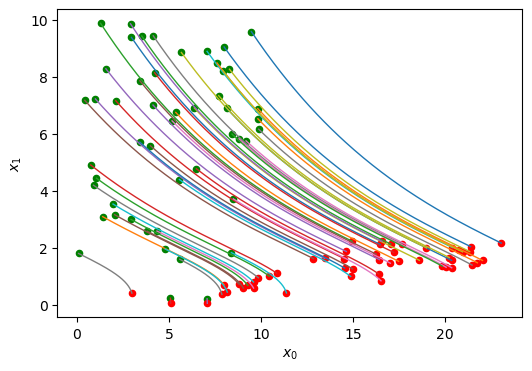

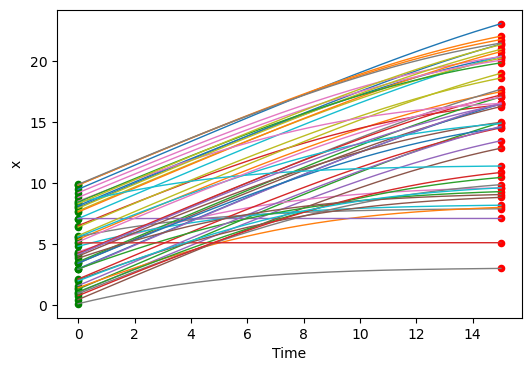

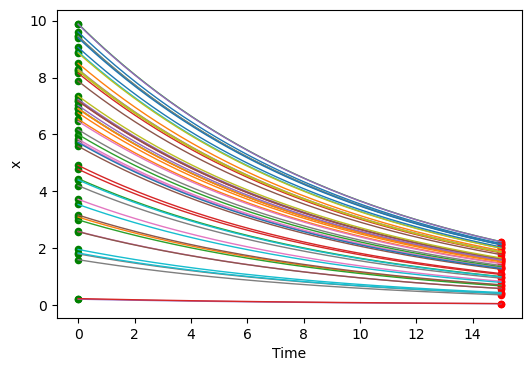

In [3]:
# Generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, 0, dim_x, dim_k)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:1], ode.T)
SINDy_data.plot_configuration(np.array(X_list)[:,:,1:2], ode.T)

In [3]:
# running SR-T:
building_blocks_lambda0, function_names0 = SRT_simulation(ode_name, ode_param, 0, freq, n_sample, noise_ratio, alg='tv', seed=seed, n_seed=n_seed, T=15)
# building_blocks_lambda1, function_names1 = SRT_simulation(ode_name, ode_param, 1, freq, n_sample, noise_ratio, alg='tv', seed=seed, n_seed=n_seed, T=T)
None

Running with: ode_name=HillODE, ode_param=[2.8, 1.0, 4.0, 0.1], x_id=0, freq=10, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
Dataset shape:  (151, 50, 2)
Functions set:  {'neg': 1, 'mul': 1, 'pow': 1, 'add': 1, 'div': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.69       2.1262e+17       11         0.206441         0.201873      5.21m


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)


   1     9.04      8.05705e+06       11         0.101699         0.105676      4.94m
   2     4.09           441358       11         0.101398          0.10839      3.01m
   3     5.33           178636       11        0.0926317         0.103984      3.43m
   4     6.24          15818.4        9         0.043908        0.0442462      3.06m
   5     6.07           153718        7        0.0437407         0.043692      2.83m
   6     6.68          76685.8       11        0.0342642        0.0339092      2.73m
   7     7.02           106749       11        0.0341511        0.0349272      2.31m
   8     7.20          75837.4       11        0.0340687        0.0356688      1.98m
   9     7.58          74159.3       11        0.0301513        0.0299573      1.78m
  10     7.57           491900       11         0.030026        0.0310857      1.53m
  11     6.98          23091.2        9        0.0272436        0.0280642      1.27m
  12     6.91          30780.7        9        0.0324475         

In [4]:
# running D-CODE
building_blocks_lambda0, function_names0 = D_CODE_simulation(ode_name, ode_param, 0, freq, n_sample, noise_ratio, seed=seed, n_seed=n_seed, T=T)
# building_blocks_lambda1, function_names1 = D_CODE_simulation(ode_name, ode_param, 1, freq, n_sample, noise_ratio, seed=seed, n_seed=n_seed, T=T)

Running with: ode_name=HillODE, ode_param=[2.8, 1.0, 4.0, 0.1], x_id=0, freq=10, n_sample=50, noise_sigma=0.01, seed=100, n_seed=1
Dataset shape:  (301, 50, 2)
Functions set:  {'neg': 1, 'mul': 1, 'pow': 1, 'add': 1, 'div': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.69      4.22852e+41        5          13.3273          14.9459      2.88m
   1     9.80      1.48213e+20       15          4.66917          4.61484      2.35m
   2     6.35      3.60273e+20       11          1.50034          1.82512      2.15m
 
promising programs:
div(X1, add(div(2.306, X1), X1))
div(X1, add(div(1.955, X1), X1))
neg(div(neg(pow(X1, 1.101)), add(div(3.381, X1), X1)))
neg(div(neg(pow(X1, 1.101)), add(div(3.381, X1), X1)))
div(neg(div(neg(pow(X1, 1.101)), add(div(3.381, X1), X1))), div(X1, X1))
